# Análisis de estación meteorológica

## Importar librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.gridspec as gridspec

## Importar archivo csv y conocer el tipo de dato

El archivo de datos se delimita con punto y coma, pero por defecto,  pd.read_csv() usa una coma (,) como delimitador.

In [3]:
estacion_meteorologica = pd.read_csv('datos_ ema_FPUNA.csv', sep=';')
print(type(estacion_meteorologica))

<class 'pandas.core.frame.DataFrame'>


## Nombre de las columnas, cantidad de filas y columnas, y tipo de dato de las columnas

In [4]:
estacion_meteorologica_nombres_columnas = estacion_meteorologica.columns
print("Nombre de las columnas: \n", estacion_meteorologica_nombres_columnas)

numero_filas, numero_columnas = estacion_meteorologica.shape
print("Numero de filas: ", numero_filas, "\nNumero de columnas: ", numero_columnas)

print("Tipo de dato de las columnas:\n", estacion_meteorologica.dtypes, sep="")

Nombre de las columnas: 
 Index(['Date / Time', 'veloc vto (m/s)', 'Direcc Vto (grados)',
       'Presion Atm (hPa)', 'Radic Global (w/m2)', 'humedad relativa',
       'Preciptacion (mm)', 'Temp del Aire °C', 'Veloc de Vto Max (m/s)'],
      dtype='object')
Numero de filas:  48084 
Numero de columnas:  9
Tipo de dato de las columnas:
Date / Time                object
veloc vto (m/s)           float64
Direcc Vto (grados)       float64
Presion Atm (hPa)         float64
Radic Global (w/m2)        object
humedad relativa          float64
Preciptacion (mm)         float64
Temp del Aire °C          float64
Veloc de Vto Max (m/s)    float64
dtype: object


La columna `Dat / Time` y `Radic Global (w/m2)` son de tipo objeto, por lo que se transformarán

In [5]:
# Convertir 'Date / Time' a tipo datetime, nuestro dato es DD/MM/YYYY HH:MM
estacion_meteorologica['Date / Time'] = pd.to_datetime(
    estacion_meteorologica['Date / Time'], 
    dayfirst=True, 
    errors='coerce'
)

# Convertir 'Radic Global (w/m2)' a tipo float, manejando valores no convertibles
estacion_meteorologica['Radic Global (w/m2)'] = pd.to_numeric(
    estacion_meteorologica['Radic Global (w/m2)'], 
    errors='coerce'
)

# Verificar los cambios
print(estacion_meteorologica.dtypes)


Date / Time               datetime64[ns]
veloc vto (m/s)                  float64
Direcc Vto (grados)              float64
Presion Atm (hPa)                float64
Radic Global (w/m2)              float64
humedad relativa                 float64
Preciptacion (mm)                float64
Temp del Aire °C                 float64
Veloc de Vto Max (m/s)           float64
dtype: object


## Estadística descriptiva del conjunto de datos

In [6]:
estacion_meteorologica.describe()

,Date / Time,veloc vto (m/s),Direcc Vto (grados),Presion Atm (hPa),Radic Global (w/m2),humedad relativa,Preciptacion (mm),Temp del Aire °C,Veloc de Vto Max (m/s)
count,47752,47878.000000,47576.000000,47340.000000,47569.000000,47239.000000,47842.000000,47620.000000,46987.000000
mean,2022-05-17 13:28:31.291673856,1.419218,150.294855,998.730042,199.510564,71.307818,0.026759,22.924353,3.346700
min,2021-12-01 00:10:00,0.100000,0.000000,0.000000,-1.700000,17.000000,0.000000,2.100000,0.100000
25%,2022-02-22 18:27:30,0.700000,70.000000,995.100000,0.700000,54.000000,0.000000,17.600000,1.600000
50%,2022-05-17 16:55:00,1.300000,157.000000,998.600000,3.500000,73.000000,0.000000,22.600000,3.100000
75%,2022-08-09 09:12:30,2.000000,209.000000,1002.100000,344.100000,91.000000,0.000000,28.000000,4.700000
max,2022-10-31 21:40:00,7.700000,357.000000,1018.800000,1197.000000,100.000000,25.600000,43.300000,19.600000
std,NaN,0.970870,84.994602,6.940906,298.853920,21.141501,0.388993,7.531531,2.235738


### Acceder a una columna (serie) de interés

In [7]:
temperatura_estacion_meteorologica = estacion_meteorologica['Temp del Aire °C']
print(temperatura_estacion_meteorologica)

# Conocer una fila específica
print('Fila 4: ', temperatura_estacion_meteorologica[4])


0        21.5
1        21.5
2        21.9
3        21.9
4        21.6
         ... 
48079    16.2
48080    15.4
48081    14.9
48082    14.9
48083    14.7
Name: Temp del Aire °C, Length: 48084, dtype: float64
Fila 4:  21.6


Conocer la media de una columna de interes

In [8]:
media_temperatura_estacion_meteorologica = temperatura_estacion_meteorologica.mean()
print("La media es: ", media_temperatura_estacion_meteorologica)

La media es:  22.924353212935745


Contar la cantidad de datos que tiene la columna de interes

In [9]:
cantidad_datos_temperatura_estacion_meteorologica = temperatura_estacion_meteorologica.count()
print(cantidad_datos_temperatura_estacion_meteorologica)

47620


Conocer los primeros cinco valores del conjunto de datos

In [10]:
estacion_meteorologica.head()

,Date / Time,veloc vto (m/s),Direcc Vto (grados),Presion Atm (hPa),Radic Global (w/m2),humedad relativa,Preciptacion (mm),Temp del Aire °C,Veloc de Vto Max (m/s)
0,2021-12-01 00:10:00,0.6,197.0,998.3,1.9,68.0,0.0,21.5,1.6
1,2021-12-01 00:20:00,0.4,192.0,998.3,1.9,68.0,0.0,21.5,2.4
2,2021-12-01 00:30:00,0.5,182.0,998.4,1.9,64.0,0.0,21.9,1.7
3,2021-12-01 00:40:00,0.7,175.0,998.6,1.0,65.0,0.0,21.9,2.1
4,2021-12-01 00:50:00,0.6,183.0,998.6,0.8,67.0,0.0,21.6,1.9


## Seleccionar datos específicos de nuestro conjunto de datos

In [11]:
#Primera fila
estacion_meteorologica.iloc[0]

Date / Time               2021-12-01 00:10:00
veloc vto (m/s)                           0.6
Direcc Vto (grados)                     197.0
Presion Atm (hPa)                       998.3
Radic Global (w/m2)                       1.9
humedad relativa                         68.0
Preciptacion (mm)                         0.0
Temp del Aire °C                         21.5
Veloc de Vto Max (m/s)                    1.6
Name: 0, dtype: object

In [12]:
# Primera fila y primera columna
estacion_meteorologica.iloc[0,0]

Timestamp('2021-12-01 00:10:00')

In [13]:
# Rango de fila: fila 1 a 2
estacion_meteorologica.iloc[1:3]

,Date / Time,veloc vto (m/s),Direcc Vto (grados),Presion Atm (hPa),Radic Global (w/m2),humedad relativa,Preciptacion (mm),Temp del Aire °C,Veloc de Vto Max (m/s)
1,2021-12-01 00:20:00,0.4,192.0,998.3,1.9,68.0,0.0,21.5,2.4
2,2021-12-01 00:30:00,0.5,182.0,998.4,1.9,64.0,0.0,21.9,1.7


In [14]:
# Rango de fila y columna: fila de 1 a 2 y columna de 0 a 1
estacion_meteorologica.iloc[1:3, 0:2]

,Date / Time,veloc vto (m/s)
1,2021-12-01 00:20:00,0.4
2,2021-12-01 00:30:00,0.5


Seleccionar una fila específica por su índice

In [15]:
# Con la fila cero
fila_index_0 = estacion_meteorologica.loc[0]
fila_index_0

Date / Time               2021-12-01 00:10:00
veloc vto (m/s)                           0.6
Direcc Vto (grados)                     197.0
Presion Atm (hPa)                       998.3
Radic Global (w/m2)                       1.9
humedad relativa                         68.0
Preciptacion (mm)                         0.0
Temp del Aire °C                         21.5
Veloc de Vto Max (m/s)                    1.6
Name: 0, dtype: object

In [16]:
# Selecciona una columna por su nombre desde cero
presion_atm_estacion_meteorologica = estacion_meteorologica.loc[0:, 'Presion Atm (hPa)']
presion_atm_estacion_meteorologica

0         998.3
1         998.3
2         998.4
3         998.6
4         998.6
          ...  
48079    1008.2
48080    1008.2
48081    1008.3
48082    1008.2
48083    1008.2
Name: Presion Atm (hPa), Length: 48084, dtype: float64

In [17]:
# Selecciona dos columnas por su nombre desde cero
presionAtm_humedadRelativa_estacion_meteorologica = estacion_meteorologica.loc[0:, ['Presion Atm (hPa)', 'humedad relativa']]
presionAtm_humedadRelativa_estacion_meteorologica

,Presion Atm (hPa),humedad relativa
0,998.3,68.0
1,998.3,68.0
2,998.4,64.0
3,998.6,65.0
4,998.6,67.0
...,...,...
48079,1008.2,56.0
48080,1008.2,58.0
48081,1008.3,60.0
48082,1008.2,62.0


Conocer una tiempo (hora y fecha) en específico

In [18]:
hora_fecha = estacion_meteorologica.loc[estacion_meteorologica['Date / Time'] == "2021-12-01 00:10:00"]
hora_fecha

,Date / Time,veloc vto (m/s),Direcc Vto (grados),Presion Atm (hPa),Radic Global (w/m2),humedad relativa,Preciptacion (mm),Temp del Aire °C,Veloc de Vto Max (m/s)
0,2021-12-01 00:10:00,0.6,197.0,998.3,1.9,68.0,0.0,21.5,1.6


Selecciona dos fechas (dos filas)

In [19]:
hora_fecha_2 = estacion_meteorologica.loc[
    (estacion_meteorologica['Date / Time'] == "2021-12-01 00:10:00") | 
    (estacion_meteorologica['Date / Time'] == "2021-12-01 00:20:00"),
    :
]
hora_fecha_2

,Date / Time,veloc vto (m/s),Direcc Vto (grados),Presion Atm (hPa),Radic Global (w/m2),humedad relativa,Preciptacion (mm),Temp del Aire °C,Veloc de Vto Max (m/s)
0,2021-12-01 00:10:00,0.6,197.0,998.3,1.9,68.0,0.0,21.5,1.6
1,2021-12-01 00:20:00,0.4,192.0,998.3,1.9,68.0,0.0,21.5,2.4


## Datos faltantes

In [20]:
datos_faltantes = estacion_meteorologica.isna()
datos_faltantes.head() # Mostrar los primeros cinco datos faltantes

,Date / Time,veloc vto (m/s),Direcc Vto (grados),Presion Atm (hPa),Radic Global (w/m2),humedad relativa,Preciptacion (mm),Temp del Aire °C,Veloc de Vto Max (m/s)
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


Sumar la cantidad de datos faltantes por columna

In [21]:
conteo_datos_faltantes = estacion_meteorologica.isna().sum()
conteo_datos_faltantes

Date / Time                332
veloc vto (m/s)            206
Direcc Vto (grados)        508
Presion Atm (hPa)          744
Radic Global (w/m2)        515
humedad relativa           845
Preciptacion (mm)          242
Temp del Aire °C           464
Veloc de Vto Max (m/s)    1097
dtype: int64

Existe una cantidad considerable de datos faltantes en ciertas variables

### Analizar la cantidad de datos faltantes

Calculo del porcentaje faltante para cada columna

In [22]:
porcentaje_datos_faltantes = estacion_meteorologica.isna().mean()*100
porcentaje_datos_faltantes

Date / Time               0.690458
veloc vto (m/s)           0.428417
Direcc Vto (grados)       1.056484
Presion Atm (hPa)         1.547292
Radic Global (w/m2)       1.071042
humedad relativa          1.757341
Preciptacion (mm)         0.503286
Temp del Aire °C          0.964978
Veloc de Vto Max (m/s)    2.281424
dtype: float64

Lo anterior indica que todas las columnas tienen menos de 3% de valores faltantes, lo cual es bajo.

### Rellenar información

La media para columnas con datos que no tienen valores atípicos significativos ni una fuerte dependencia temporal

In [23]:
# Rellenar con la media
columnas_media = ['Presion Atm (hPa)', 'Temp del Aire °C']
for col in columnas_media:
    estacion_meteorologica[col] = estacion_meteorologica[col].fillna(estacion_meteorologica[col].mean())

# Rellenar con la mediana
columnas_mediana = ['Preciptacion (mm)', 'Veloc de Vto Max (m/s)']
for col in columnas_mediana:    
    estacion_meteorologica[col] = estacion_meteorologica[col].fillna(estacion_meteorologica[col].median())

# Rellenar con la moda
columnas_moda = ['Direcc Vto (grados)']
for col in columnas_moda:
    moda = estacion_meteorologica[col].mode()[0]  # Obtener el primer valor de la moda
    estacion_meteorologica[col] = estacion_meteorologica[col].fillna(moda)

# Rellenar con interpolación lineal
columns_interpolate = ['Radic Global (w/m2)', 'humedad relativa', 'veloc vto (m/s)']
estacion_meteorologica[columns_interpolate] = estacion_meteorologica[columns_interpolate].interpolate(method='linear')


Verificar que no haya más valores faltantes

In [24]:
conteo_datos_faltantes = estacion_meteorologica.isna().sum()
conteo_datos_faltantes

Date / Time               332
veloc vto (m/s)             0
Direcc Vto (grados)         0
Presion Atm (hPa)           0
Radic Global (w/m2)         0
humedad relativa            0
Preciptacion (mm)           0
Temp del Aire °C            0
Veloc de Vto Max (m/s)      0
dtype: int64

Verificar si los valores de `Date / Time` están duplicados

In [25]:
duplicados_date_time_estacion_meteorologica = estacion_meteorologica['Date / Time'].duplicated().sum()
print(f'Número de duplicados en Date / Time: {duplicados_date_time_estacion_meteorologica}')

Número de duplicados en Date / Time: 331


In [26]:
duplicados_exactos = estacion_meteorologica[estacion_meteorologica.duplicated(subset='Date / Time', keep=False)]
print(duplicados_exactos)

      Date / Time  veloc vto (m/s)  Direcc Vto (grados)  Presion Atm (hPa)  \
143           NaT              0.5                175.0         998.730042   
287           NaT              1.3                144.0         998.730042   
431           NaT              1.3                 58.0         998.000000   
575           NaT              1.4                 58.0         998.730042   
719           NaT              1.3                183.0        1002.600000   
...           ...              ...                  ...                ...   
47377         NaT              1.7                259.0         992.500000   
47521         NaT              0.5                212.0         996.000000   
47665         NaT              0.1                140.0         992.300000   
47809         NaT              2.4                 59.0         988.700000   
47953         NaT              0.6                 87.0         988.500000   

       Radic Global (w/m2)  humedad relativa  Preciptacion (mm)

Hay 332 valores faltantes de la columna `Date / Time`, hay 331 filas duplicadas de esta columna.

Los 332 valores corresponde a NaT (not available) y se distribuyen de tal forma que 331 filas duplicadas tienen NaT y 1 fila única también tiene NaT

### Generar tiempo/fecha

Es necesario crear esta secuencia porque la columna `Date / Time` **tiene valores faltantes y duplicados, y esta secuencia será la referencia para identificar y completar los datos que faltan.**

El conjunto de datos toma un dato cada 10 minutos de forma ciclina desde  2021-12-01 00:10:00 (formato en año, mes, día, hora, minuto, segundos) hasta 2022-10-31 20:50:00

1. Generar secuencia completa de tiempo

In [27]:
fecha_inicial = '2021-12-01 00:10:00'
fecha_final = '2022-10-31 20:50:00'
rango_tiempo = pd.date_range(start=fecha_inicial, end=fecha_final, freq='10min')

2. Crear un conjunto de datos basado en la secuencia completa

In [28]:
tiempo_estacion_meteorologica = pd.DataFrame({'Date / Time': rango_tiempo})

3. Combinar el conjunto de datos original con la secuencia completa

In [29]:
unir_conjunto_datos = pd.merge(tiempo_estacion_meteorologica, estacion_meteorologica, on='Date / Time', how='left')

4. Rellenar valores faltantes en otras columnas

In [30]:
unir_conjunto_datos = unir_conjunto_datos.ffill()

5. Actualizar el conjuto de datos original

In [31]:
estacion_meteorologica = unir_conjunto_datos.copy()

Verificar que no hay valores faltantes

In [32]:
conteo_datos_faltantes = estacion_meteorologica.isna().sum()
conteo_datos_faltantes

Date / Time               0
veloc vto (m/s)           0
Direcc Vto (grados)       0
Presion Atm (hPa)         0
Radic Global (w/m2)       0
humedad relativa          0
Preciptacion (mm)         0
Temp del Aire °C          0
Veloc de Vto Max (m/s)    0
dtype: int64

## Filtro de datos

Filtrar valores de presion atmosferica mayores a 1000

In [ ]:
altaPresion_estacion_meteorologica = estacion_meteorologica[estacion_meteorologica['Presion Atm (hPa)'] > 1000]
altaPresion_estacion_meteorologica

,Date / Time,veloc vto (m/s),Direcc Vto (grados),Presion Atm (hPa),Radic Global (w/m2),humedad relativa,Preciptacion (mm),Temp del Aire °C,Veloc de Vto Max (m/s)
54,2021-12-01 09:10:00,0.1,306.0,1000.1,13.8,96.0,0.0,15.9,0.1
55,2021-12-01 09:20:00,0.2,321.0,1000.2,20.5,96.0,0.0,16.1,0.6
56,2021-12-01 09:30:00,0.1,322.0,1000.2,26.7,95.0,0.0,16.2,0.4
57,2021-12-01 09:40:00,0.2,202.0,1000.3,96.6,92.0,0.0,17.0,1.0
58,2021-12-01 09:50:00,0.5,87.0,1000.3,137.3,75.0,0.0,19.9,1.7
...,...,...,...,...,...,...,...,...,...
48216,2022-10-31 20:10:00,3.3,134.0,1008.0,174.2,52.0,0.0,15.8,10.9
48217,2022-10-31 20:20:00,3.0,197.0,1008.2,175.8,53.0,0.0,15.5,8.1
48218,2022-10-31 20:30:00,3.5,158.0,1008.1,202.5,56.0,0.0,15.5,12.0
48219,2022-10-31 20:40:00,2.6,154.0,1008.1,299.9,55.0,0.0,16.1,7.3


Filtrar valores de presion atmosférica mayor que 1000 y precipitación mayor que 0

In [34]:
precipitacion_altaPresion_estacion_meteorologica = estacion_meteorologica[(estacion_meteorologica['Presion Atm (hPa)'] > 1000) & estacion_meteorologica['Preciptacion (mm)'] > 0.0]
precipitacion_altaPresion_estacion_meteorologica

,Date / Time,veloc vto (m/s),Direcc Vto (grados),Presion Atm (hPa),Radic Global (w/m2),humedad relativa,Preciptacion (mm),Temp del Aire °C,Veloc de Vto Max (m/s)
4833,2022-01-03 13:40:00,1.0,271.0,1000.7,13.2,96.0,0.9,24.0,2.4
4834,2022-01-03 13:50:00,1.8,244.0,1000.8,18.6,97.0,0.9,24.1,3.5
4835,2022-01-03 14:00:00,2.9,242.0,1000.9,10.9,96.0,0.9,23.8,6.5
4836,2022-01-03 14:10:00,3.0,241.0,1000.9,24.9,96.0,0.9,23.3,6.0
4837,2022-01-03 14:20:00,2.7,237.0,1001.2,28.7,96.0,0.9,22.9,7.6
...,...,...,...,...,...,...,...,...,...
48168,2022-10-31 12:10:00,5.0,186.0,1004.0,117.8,95.0,0.1,13.6,11.0
48169,2022-10-31 12:20:00,3.9,202.0,1004.4,101.6,96.0,0.1,13.5,11.8
48170,2022-10-31 12:30:00,4.4,159.0,1004.6,72.1,96.0,0.1,13.4,11.8
48171,2022-10-31 12:40:00,3.9,218.0,1004.7,112.0,96.0,0.1,13.3,9.7


Filtrar por el año

In [35]:
informacion_2021_estacion_meteorologica = estacion_meteorologica[estacion_meteorologica['Date / Time'].dt.year == 2021]
informacion_2021_estacion_meteorologica

,Date / Time,veloc vto (m/s),Direcc Vto (grados),Presion Atm (hPa),Radic Global (w/m2),humedad relativa,Preciptacion (mm),Temp del Aire °C,Veloc de Vto Max (m/s)
0,2021-12-01 00:10:00,0.6,197.0,998.3,1.9,68.0,0.0,21.5,1.6
1,2021-12-01 00:20:00,0.4,192.0,998.3,1.9,68.0,0.0,21.5,2.4
2,2021-12-01 00:30:00,0.5,182.0,998.4,1.9,64.0,0.0,21.9,1.7
3,2021-12-01 00:40:00,0.7,175.0,998.6,1.0,65.0,0.0,21.9,2.1
4,2021-12-01 00:50:00,0.6,183.0,998.6,0.8,67.0,0.0,21.6,1.9
...,...,...,...,...,...,...,...,...,...
4458,2021-12-31 23:10:00,0.1,330.0,991.5,0.5,63.0,0.0,30.5,0.1
4459,2021-12-31 23:20:00,0.1,308.0,991.7,1.1,62.0,0.0,29.8,0.1
4460,2021-12-31 23:30:00,0.1,190.0,991.8,1.7,65.0,0.0,29.3,0.1
4461,2021-12-31 23:40:00,0.1,25.0,992.0,1.4,69.0,0.0,29.0,0.1


Fecha con otra columna

In [36]:
informacion_2021_radiacion_globao_estacion_meteorologico = estacion_meteorologica[(estacion_meteorologica['Date / Time'].dt.year == 2021) & (estacion_meteorologica['Radic Global (w/m2)'])]
informacion_2021_radiacion_globao_estacion_meteorologico

,Date / Time,veloc vto (m/s),Direcc Vto (grados),Presion Atm (hPa),Radic Global (w/m2),humedad relativa,Preciptacion (mm),Temp del Aire °C,Veloc de Vto Max (m/s)
0,2021-12-01 00:10:00,0.6,197.0,998.3,1.9,68.0,0.0,21.5,1.6
1,2021-12-01 00:20:00,0.4,192.0,998.3,1.9,68.0,0.0,21.5,2.4
2,2021-12-01 00:30:00,0.5,182.0,998.4,1.9,64.0,0.0,21.9,1.7
3,2021-12-01 00:40:00,0.7,175.0,998.6,1.0,65.0,0.0,21.9,2.1
4,2021-12-01 00:50:00,0.6,183.0,998.6,0.8,67.0,0.0,21.6,1.9
...,...,...,...,...,...,...,...,...,...
4458,2021-12-31 23:10:00,0.1,330.0,991.5,0.5,63.0,0.0,30.5,0.1
4459,2021-12-31 23:20:00,0.1,308.0,991.7,1.1,62.0,0.0,29.8,0.1
4460,2021-12-31 23:30:00,0.1,190.0,991.8,1.7,65.0,0.0,29.3,0.1
4461,2021-12-31 23:40:00,0.1,25.0,992.0,1.4,69.0,0.0,29.0,0.1


Filtrado por año y mes. **Debemos tener en cuenta el rango de tiempo de nuestro conjunto de datos**

In [37]:
año_mes_estacion_meteorologica = estacion_meteorologica[(estacion_meteorologica['Date / Time'].dt.year == 2021) & (estacion_meteorologica['Date / Time'].dt.month == 12)]
año_mes_estacion_meteorologica

,Date / Time,veloc vto (m/s),Direcc Vto (grados),Presion Atm (hPa),Radic Global (w/m2),humedad relativa,Preciptacion (mm),Temp del Aire °C,Veloc de Vto Max (m/s)
0,2021-12-01 00:10:00,0.6,197.0,998.3,1.9,68.0,0.0,21.5,1.6
1,2021-12-01 00:20:00,0.4,192.0,998.3,1.9,68.0,0.0,21.5,2.4
2,2021-12-01 00:30:00,0.5,182.0,998.4,1.9,64.0,0.0,21.9,1.7
3,2021-12-01 00:40:00,0.7,175.0,998.6,1.0,65.0,0.0,21.9,2.1
4,2021-12-01 00:50:00,0.6,183.0,998.6,0.8,67.0,0.0,21.6,1.9
...,...,...,...,...,...,...,...,...,...
4458,2021-12-31 23:10:00,0.1,330.0,991.5,0.5,63.0,0.0,30.5,0.1
4459,2021-12-31 23:20:00,0.1,308.0,991.7,1.1,62.0,0.0,29.8,0.1
4460,2021-12-31 23:30:00,0.1,190.0,991.8,1.7,65.0,0.0,29.3,0.1
4461,2021-12-31 23:40:00,0.1,25.0,992.0,1.4,69.0,0.0,29.0,0.1


## Tablas pivotantes

También conocidas como tablas dinámicas

### Resumir datos por períodos de tiempo

Crear una tabla pivotante con el promedio diario de velocidad del viento y temperatura

In [38]:
# Agregar una columna con solo la fecha
estacion_meteorologica['Date'] = estacion_meteorologica['Date / Time'].dt.date

tabla_promedios_diarios_velocidad_viento_temperatura_aire = estacion_meteorologica.pivot_table(
    index='Date',  # Agrupar por fecha
    values=['veloc vto (m/s)', 'Temp del Aire °C'],
    aggfunc='mean'  # Función de agregación
)

tabla_promedios_diarios_velocidad_viento_temperatura_aire


,Temp del Aire °C,veloc vto (m/s)
Date,,
2021-12-01,25.753147,0.911888
2021-12-02,27.665278,1.278472
2021-12-03,28.651389,1.204861
2021-12-04,29.207639,1.229167
2021-12-05,29.091667,1.700000
...,...,...
2022-10-27,24.004861,1.232639
2022-10-28,25.543750,1.148611
2022-10-29,27.400000,1.787500


Crear una tabla pivotante con el promedio de radiación global y precipitación por hora

In [39]:
estacion_meteorologica['Hour'] = estacion_meteorologica['Date / Time'].dt.hour  # Extraer hora del día

tabla_promedios_radiacion_precipitacion_por_hora = estacion_meteorologica.pivot_table(
    index='Hour',  # Agrupar por hora
    values=['Radic Global (w/m2)', 'Preciptacion (mm)'],  # Columnas a analizar
    aggfunc='mean'  # Promediar los valores
)

tabla_promedios_radiacion_precipitacion_por_hora


,Preciptacion (mm),Radic Global (w/m2)
Hour,,
0,0.014783,1.038269
1,0.029900,0.811343
2,0.020547,0.804179
3,0.014229,0.809791
4,0.017562,0.754820
5,0.015323,0.750687
6,0.030398,0.767338
7,0.023234,0.722214
8,0.020398,0.739179


Crear una tabla pivotante con la velocidad máxima del viento agrupada por dirección del viento redondeada a 10 grados

In [40]:
estacion_meteorologica['Dir Vto (grados) Rounded'] = (estacion_meteorologica['Direcc Vto (grados)'] // 10) * 10

tabla_velocidad_maxima_por_direccion_viento = estacion_meteorologica.pivot_table(
    index='Dir Vto (grados) Rounded',  # Agrupar por dirección redondeada
    values='Veloc de Vto Max (m/s)',  # Columna de interés
    aggfunc='max'  # Tomar el valor máximo
)

tabla_velocidad_maxima_por_direccion_viento


,Veloc de Vto Max (m/s)
Dir Vto (grados) Rounded,
0.0,12.0
10.0,13.2
20.0,12.3
30.0,14.9
40.0,12.4
50.0,12.7
60.0,10.8
70.0,12.3
80.0,12.4


Limpieza del código (personal)

In [41]:
estacion_meteorologica.drop(['Date', 'Hour'], axis=1, inplace=True)


## Series de tiempo

Establecemos la columna `Date / Time` como el índice del conjunto de datos

In [42]:
estacion_meteorologica.set_index('Date / Time', inplace=True)

Se estrae el año, mes, día, día de la semana y hora.
del índice y se guarda en una nueva columna del conjunto de datos

In [43]:
estacion_meteorologica['Year'] = estacion_meteorologica.index.year #año
estacion_meteorologica['Month'] = estacion_meteorologica.index.month #mes
estacion_meteorologica['Day'] = estacion_meteorologica.index.day #día
estacion_meteorologica['Weekday'] = estacion_meteorologica.index.weekday #día de la semana
estacion_meteorologica['Hour'] = estacion_meteorologica.index.weekday #hora

In [44]:
estacion_meteorologica.head()

,veloc vto (m/s),Direcc Vto (grados),Presion Atm (hPa),Radic Global (w/m2),humedad relativa,Preciptacion (mm),Temp del Aire °C,Veloc de Vto Max (m/s),Dir Vto (grados) Rounded,Year,Month,Day,Weekday,Hour
Date / Time,,,,,,,,,,,,,,
2021-12-01 00:10:00,0.6,197.0,998.3,1.9,68.0,0.0,21.5,1.6,190.0,2021,12,1,2,2
2021-12-01 00:20:00,0.4,192.0,998.3,1.9,68.0,0.0,21.5,2.4,190.0,2021,12,1,2,2
2021-12-01 00:30:00,0.5,182.0,998.4,1.9,64.0,0.0,21.9,1.7,180.0,2021,12,1,2,2
2021-12-01 00:40:00,0.7,175.0,998.6,1.0,65.0,0.0,21.9,2.1,170.0,2021,12,1,2,2
2021-12-01 00:50:00,0.6,183.0,998.6,0.8,67.0,0.0,21.6,1.9,180.0,2021,12,1,2,2


Ver la información del 2021

In [45]:
estacion_meteorologica_2021 = estacion_meteorologica.loc['2021']
estacion_meteorologica_2021.head()

,veloc vto (m/s),Direcc Vto (grados),Presion Atm (hPa),Radic Global (w/m2),humedad relativa,Preciptacion (mm),Temp del Aire °C,Veloc de Vto Max (m/s),Dir Vto (grados) Rounded,Year,Month,Day,Weekday,Hour
Date / Time,,,,,,,,,,,,,,
2021-12-01 00:10:00,0.6,197.0,998.3,1.9,68.0,0.0,21.5,1.6,190.0,2021,12,1,2,2
2021-12-01 00:20:00,0.4,192.0,998.3,1.9,68.0,0.0,21.5,2.4,190.0,2021,12,1,2,2
2021-12-01 00:30:00,0.5,182.0,998.4,1.9,64.0,0.0,21.9,1.7,180.0,2021,12,1,2,2
2021-12-01 00:40:00,0.7,175.0,998.6,1.0,65.0,0.0,21.9,2.1,170.0,2021,12,1,2,2
2021-12-01 00:50:00,0.6,183.0,998.6,0.8,67.0,0.0,21.6,1.9,180.0,2021,12,1,2,2


Ver la información de diciembre de 2021

In [46]:
estacion_meteorologica_2021_diciembre = estacion_meteorologica_2021.loc['2021-12']
estacion_meteorologica_2021_diciembre

,veloc vto (m/s),Direcc Vto (grados),Presion Atm (hPa),Radic Global (w/m2),humedad relativa,Preciptacion (mm),Temp del Aire °C,Veloc de Vto Max (m/s),Dir Vto (grados) Rounded,Year,Month,Day,Weekday,Hour
Date / Time,,,,,,,,,,,,,,
2021-12-01 00:10:00,0.6,197.0,998.3,1.9,68.0,0.0,21.5,1.6,190.0,2021,12,1,2,2
2021-12-01 00:20:00,0.4,192.0,998.3,1.9,68.0,0.0,21.5,2.4,190.0,2021,12,1,2,2
2021-12-01 00:30:00,0.5,182.0,998.4,1.9,64.0,0.0,21.9,1.7,180.0,2021,12,1,2,2
2021-12-01 00:40:00,0.7,175.0,998.6,1.0,65.0,0.0,21.9,2.1,170.0,2021,12,1,2,2
2021-12-01 00:50:00,0.6,183.0,998.6,0.8,67.0,0.0,21.6,1.9,180.0,2021,12,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 23:10:00,0.1,330.0,991.5,0.5,63.0,0.0,30.5,0.1,330.0,2021,12,31,4,4
2021-12-31 23:20:00,0.1,308.0,991.7,1.1,62.0,0.0,29.8,0.1,300.0,2021,12,31,4,4
2021-12-31 23:30:00,0.1,190.0,991.8,1.7,65.0,0.0,29.3,0.1,190.0,2021,12,31,4,4


Ver rango de fecha

In [47]:
estacion_meteorologica_rango_fecha = estacion_meteorologica.loc['2021-12-01':'2021-12-15']
estacion_meteorologica_rango_fecha

,veloc vto (m/s),Direcc Vto (grados),Presion Atm (hPa),Radic Global (w/m2),humedad relativa,Preciptacion (mm),Temp del Aire °C,Veloc de Vto Max (m/s),Dir Vto (grados) Rounded,Year,Month,Day,Weekday,Hour
Date / Time,,,,,,,,,,,,,,
2021-12-01 00:10:00,0.6,197.0,998.3,1.9,68.0,0.0,21.5,1.6,190.0,2021,12,1,2,2
2021-12-01 00:20:00,0.4,192.0,998.3,1.9,68.0,0.0,21.5,2.4,190.0,2021,12,1,2,2
2021-12-01 00:30:00,0.5,182.0,998.4,1.9,64.0,0.0,21.9,1.7,180.0,2021,12,1,2,2
2021-12-01 00:40:00,0.7,175.0,998.6,1.0,65.0,0.0,21.9,2.1,170.0,2021,12,1,2,2
2021-12-01 00:50:00,0.6,183.0,998.6,0.8,67.0,0.0,21.6,1.9,180.0,2021,12,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-15 23:10:00,1.7,187.0,998.5,-0.6,74.0,0.0,27.1,4.9,180.0,2021,12,15,2,2
2021-12-15 23:20:00,1.9,189.0,998.6,-0.5,74.0,0.0,26.9,4.4,180.0,2021,12,15,2,2
2021-12-15 23:30:00,1.8,185.0,998.6,-0.5,75.0,0.0,26.7,4.9,180.0,2021,12,15,2,2


## Gráficas

Gráfico de lineas: sirve para mostar líneas a lo largo del tiempo o cambios continuos en los datos

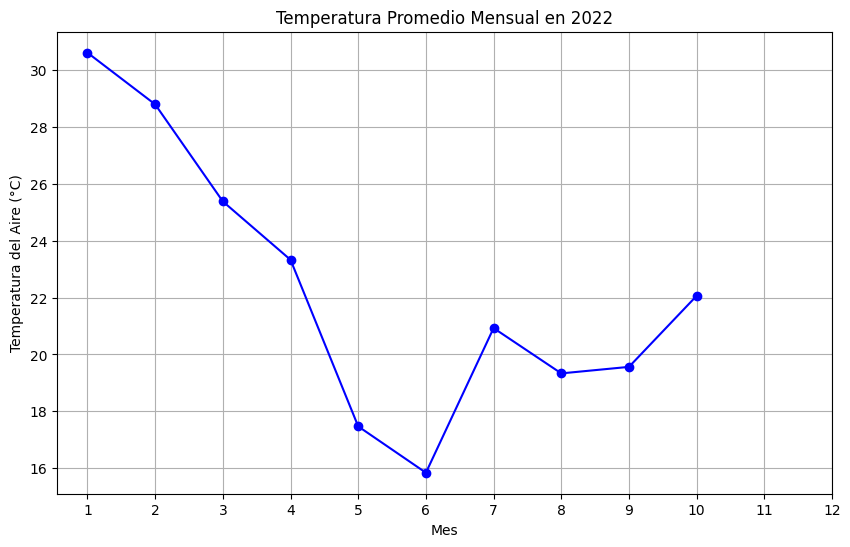

In [48]:
datos_2022 = estacion_meteorologica.loc['2022']

# Agrupar por mes y calcular la temperatura promedio
temp_promedio_mensual = datos_2022.groupby('Month')['Temp del Aire °C'].mean()

# Crear la gráfica de líneas
plt.figure(figsize=(10, 6))
plt.plot(temp_promedio_mensual.index, temp_promedio_mensual.values, marker='o', linestyle='-', color='b')
plt.title('Temperatura Promedio Mensual en 2022')
plt.xlabel('Mes')
plt.ylabel('Temperatura del Aire (°C)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

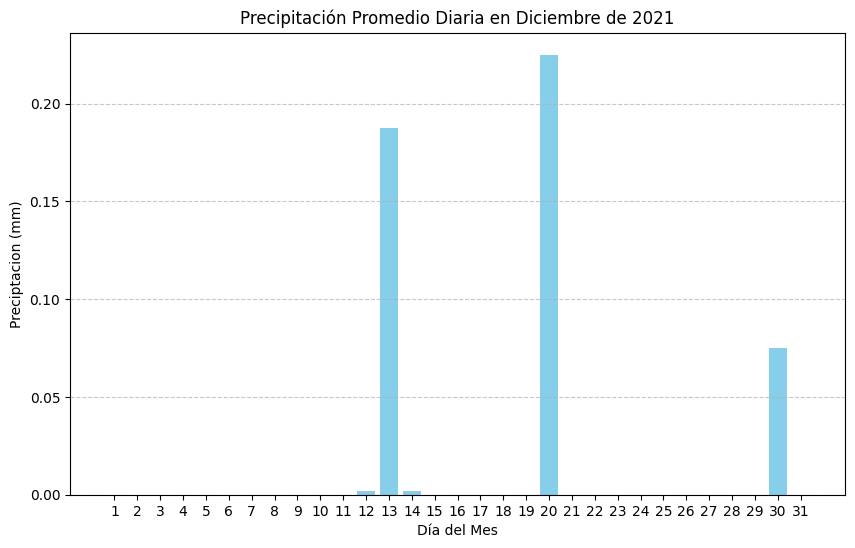

In [49]:
datos_dic_2021 = estacion_meteorologica.loc['2021-12']

# Agrupar por día y calcular el promedio de precipitación
precipitacion_promedio_diaria = datos_dic_2021.groupby('Day')['Preciptacion (mm)'].mean()

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(precipitacion_promedio_diaria.index, precipitacion_promedio_diaria.values, color='skyblue')
plt.title('Precipitación Promedio Diaria en Diciembre de 2021')
plt.xlabel('Día del Mes')
plt.ylabel('Preciptacion (mm)')
plt.xticks(range(1, 32))  # Mostrar los días del 1 al 31
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

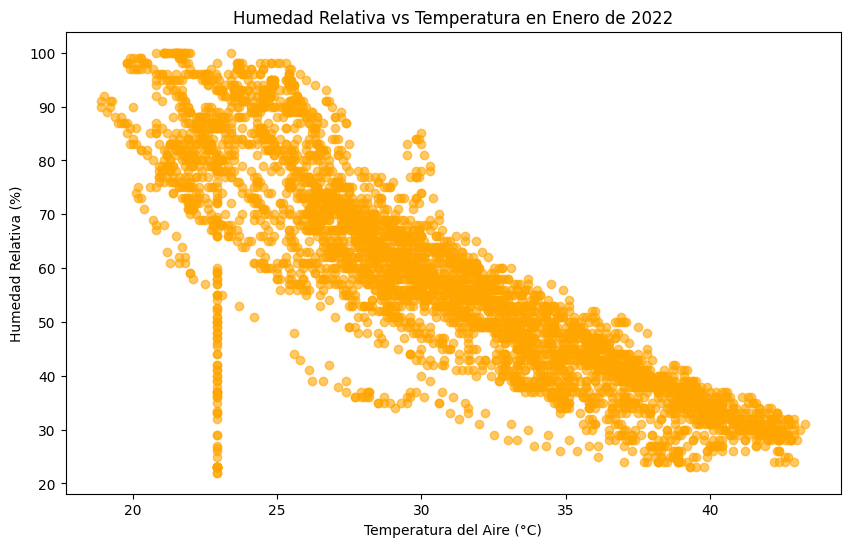

In [50]:
# Filtrar los datos para enero de 2022
datos_enero_2022 = estacion_meteorologica.loc['2022-01']

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(datos_enero_2022['Temp del Aire °C'], datos_enero_2022['humedad relativa'], color='orange', alpha=0.6)
plt.title('Humedad Relativa vs Temperatura en Enero de 2022')
plt.xlabel('Temperatura del Aire (°C)')
plt.ylabel('Humedad Relativa (%)')
plt.show()

### Subgráficos

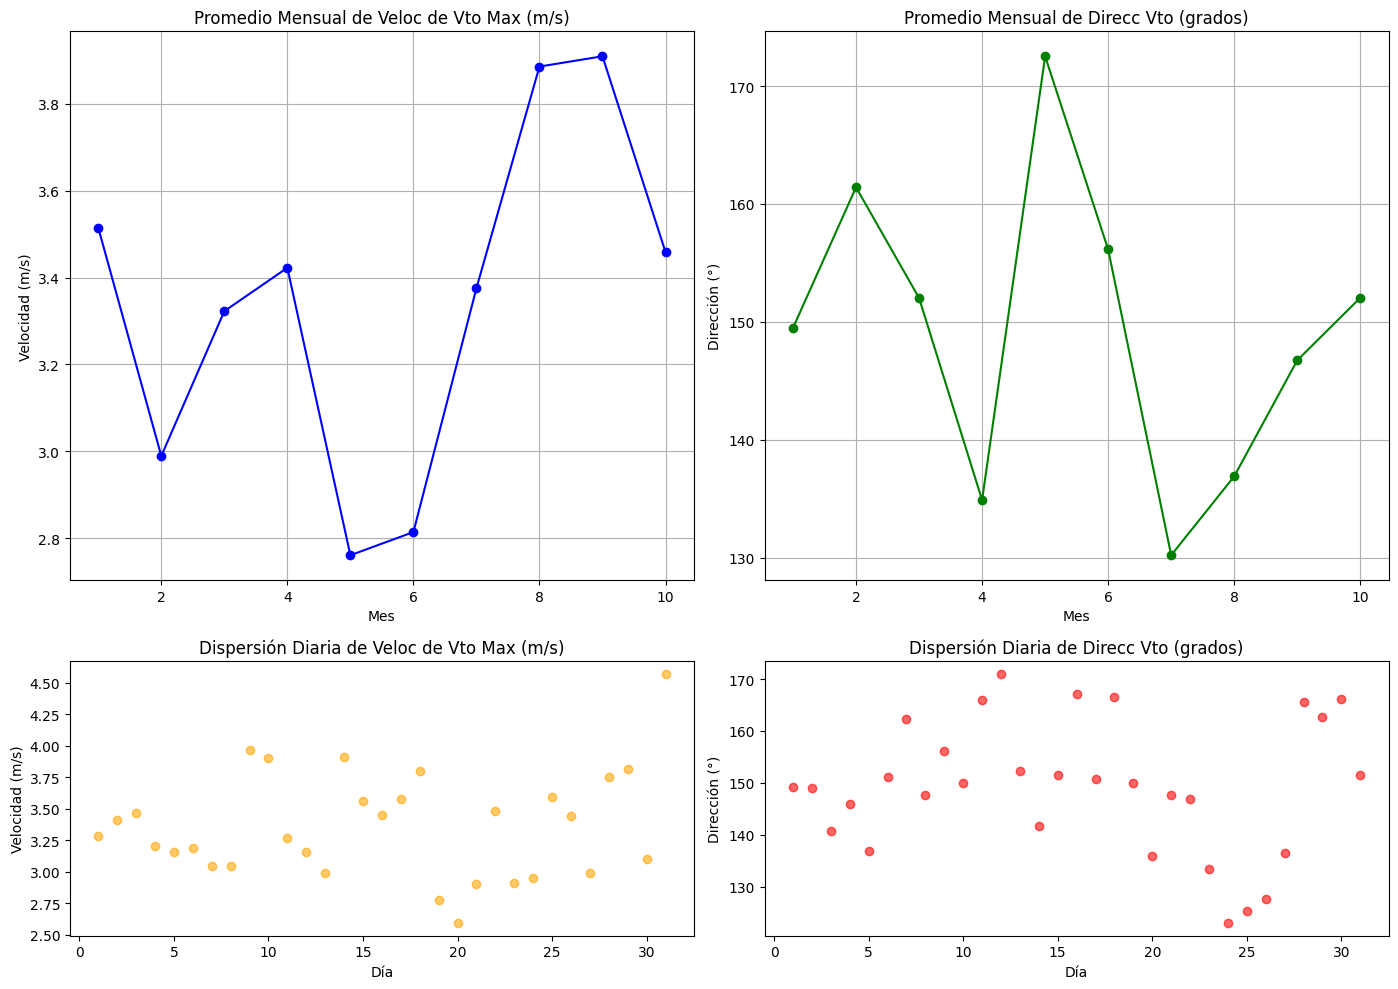

In [59]:
# Filtrar datos de un año específico (ejemplo: 2022)
datos_2022 = estacion_meteorologica.loc['2022']

# Calcular los datos necesarios para los gráficos
# 1. Promedio mensual de "Veloc de Vto Max (m/s)"
vto_max_mensual = datos_2022.groupby('Month')['Veloc de Vto Max (m/s)'].mean()

# 2. Promedio mensual de "Direcc Vto (grados)"
vto_dir_mensual = datos_2022.groupby('Month')['Direcc Vto (grados)'].mean()

# 3. Dispersión diaria de "Veloc de Vto Max (m/s)" y "Direcc Vto (grados)"
vto_max_diario = datos_2022.groupby('Day')['Veloc de Vto Max (m/s)'].mean()
vto_dir_diario = datos_2022.groupby('Day')['Direcc Vto (grados)'].mean()

# Crear la figura y la estructura de subplots
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[2, 1], width_ratios=[1, 1])

# Subplot 1: Línea mensual de "Veloc de Vto Max (m/s)"
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(vto_max_mensual.index, vto_max_mensual.values, marker='o', linestyle='-', color='blue')
ax1.set_title('Promedio Mensual de Veloc de Vto Max (m/s)')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Velocidad (m/s)')
ax1.grid(True)

# Subplot 2: Dispersión diaria de "Veloc de Vto Max (m/s)"
ax2 = fig.add_subplot(gs[1, 0])
ax2.scatter(vto_max_diario.index, vto_max_diario.values, color='orange', alpha=0.6)
ax2.set_title('Dispersión Diaria de Veloc de Vto Max (m/s)')
ax2.set_xlabel('Día')
ax2.set_ylabel('Velocidad (m/s)')

# Subplot 3: Línea mensual de "Direcc Vto (grados)"
ax3 = fig.add_subplot(gs[0, 1])
ax3.plot(vto_dir_mensual.index, vto_dir_mensual.values, marker='o', linestyle='-', color='green')
ax3.set_title('Promedio Mensual de Direcc Vto (grados)')
ax3.set_xlabel('Mes')
ax3.set_ylabel('Dirección (°)')
ax3.grid(True)

# Subplot 4: Dispersión diaria de "Direcc Vto (grados)"
ax4 = fig.add_subplot(gs[1, 1])
ax4.scatter(vto_dir_diario.index, vto_dir_diario.values, color='red', alpha=0.6)
ax4.set_title('Dispersión Diaria de Direcc Vto (grados)')
ax4.set_xlabel('Día')
ax4.set_ylabel('Dirección (°)')

# Ajustar el diseño
plt.tight_layout()
plt.show()

## Distribuciones

Visualizamos la distribución de la velocidad del viento


Text(0, 0.5, 'Frecuencia')

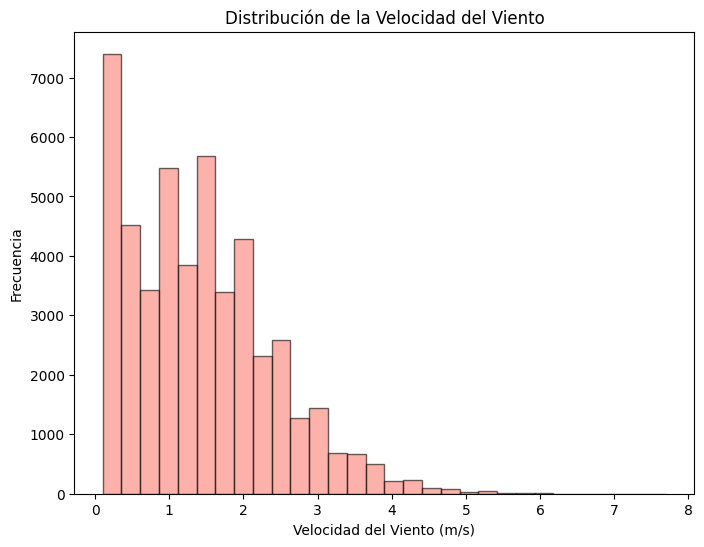

In [52]:
plt.figure(figsize=(8, 6)) 
plt.hist(estacion_meteorologica['veloc vto (m/s)'], color='salmon', bins=30, edgecolor='black', alpha=0.6) 
plt.title('Distribución de la Velocidad del Viento') 
plt.xlabel('Velocidad del Viento (m/s)') 
plt.ylabel('Frecuencia')

Boxplot de la temperatura del aire

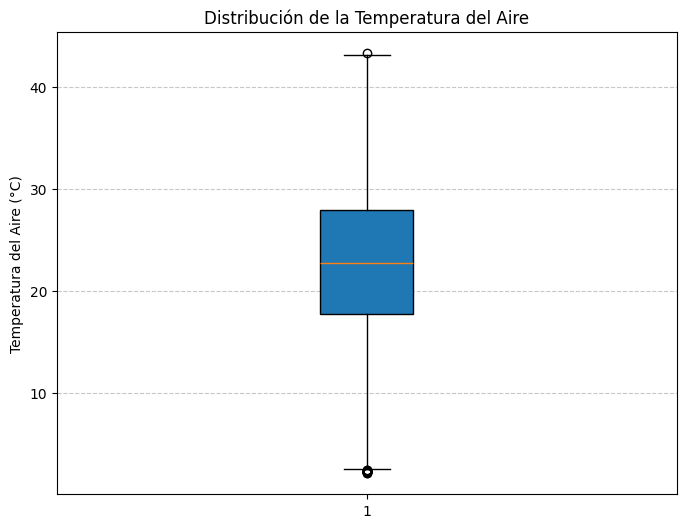

In [53]:
plt.figure(figsize=(8, 6))
plt.boxplot(estacion_meteorologica['Temp del Aire °C'], patch_artist=True, notch=False, vert=True)
plt.title('Distribución de la Temperatura del Aire')
plt.ylabel('Temperatura del Aire (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

## Series de tiempo

Se usa `.index` porque la información de la fecha está en el índice del conjunto de datos

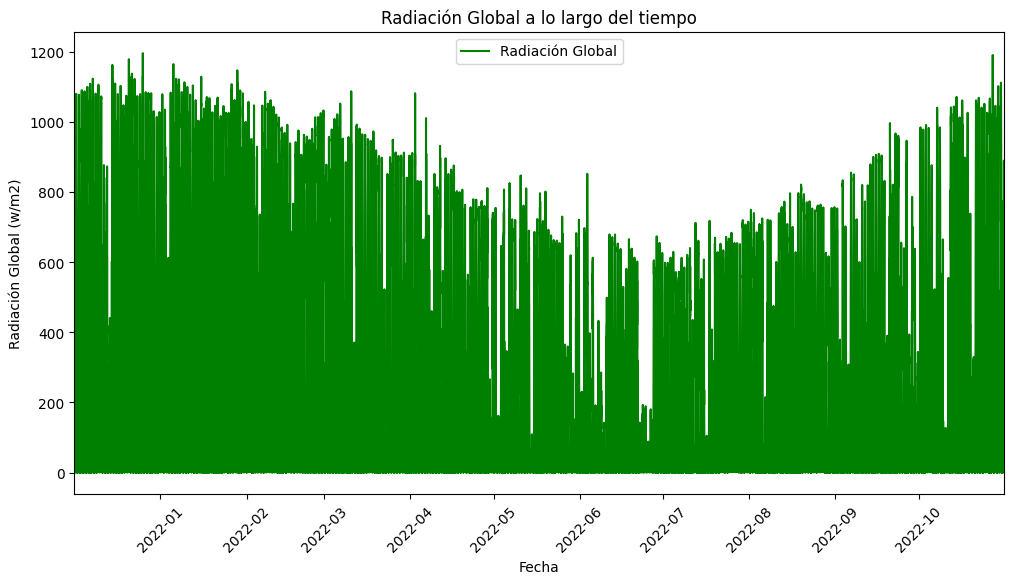

In [54]:
# Graficar "a lo largo del tiempo" y asegurar que se vean los datos relevantes
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(estacion_meteorologica.index, estacion_meteorologica['Radic Global (w/m2)'], color='g', label='Radiación Global')

# Limitar el rango del eje x para incluir todos los años presentes en los datos
ax.set_xlim(estacion_meteorologica.index.min(), estacion_meteorologica.index.max())

# Rotar las etiquetas del eje x
plt.xticks(rotation=45)
plt.title('Radiación Global a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Radiación Global (w/m2)')
plt.legend()
plt.show()


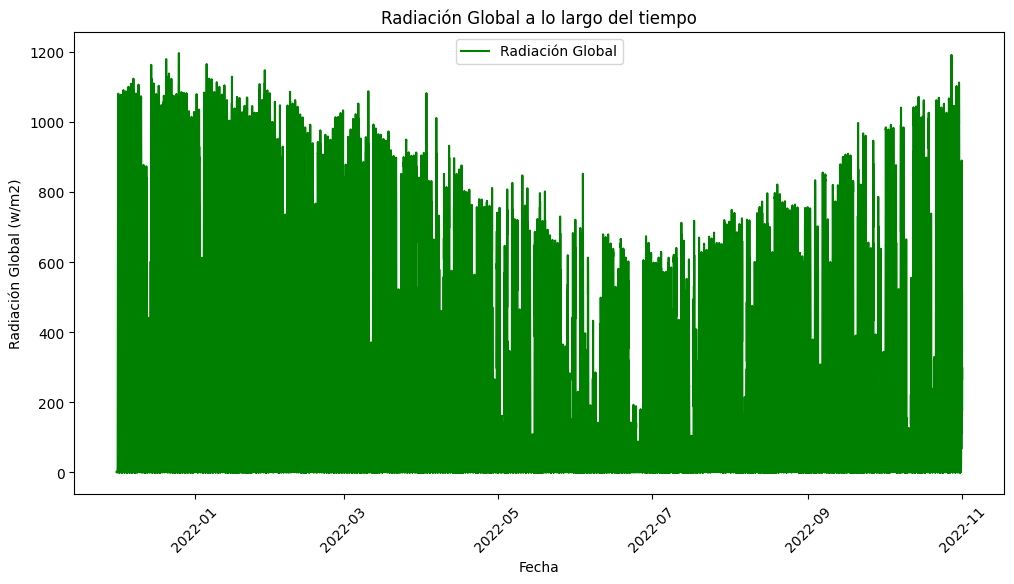

In [55]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(estacion_meteorologica.index, estacion_meteorologica['Radic Global (w/m2)'], color='g', label='Radiación Global')
plt.xticks(rotation=45)
plt.title('Radiación Global a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Radiación Global (w/m2)')
plt.legend()
plt.show()

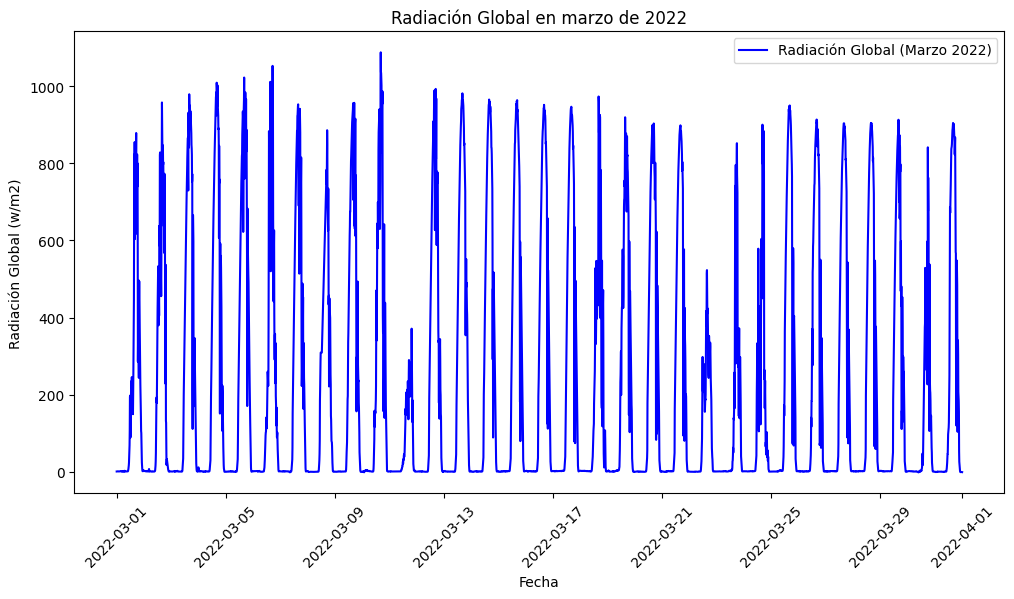

In [56]:
# Filtrar por un mes específico, por ejemplo, marzo (mes 3) de 2022
mes_especifico = estacion_meteorologica[
    (estacion_meteorologica['Year'] == 2022) & (estacion_meteorologica['Month'] == 3)
]

# Graficar
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(mes_especifico.index, mes_especifico['Radic Global (w/m2)'], color='b', label='Radiación Global (Marzo 2022)')
plt.xticks(rotation=45)
plt.title('Radiación Global en marzo de 2022')
plt.xlabel('Fecha')
plt.ylabel('Radiación Global (w/m2)')
plt.legend()
plt.show()

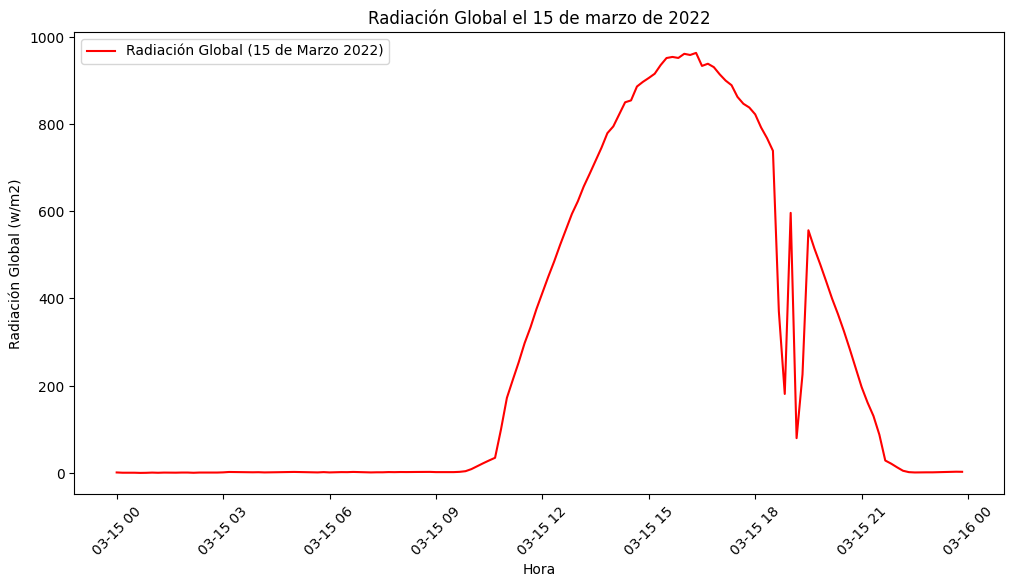

In [57]:
# Filtrar por un día específico, por ejemplo, 15 de marzo de 2022
dia_especifico = estacion_meteorologica[
    (estacion_meteorologica['Year'] == 2022) & 
    (estacion_meteorologica['Month'] == 3) & 
    (estacion_meteorologica['Day'] == 15)
]

# Graficar
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dia_especifico.index, dia_especifico['Radic Global (w/m2)'], color='r', label='Radiación Global (15 de Marzo 2022)')
plt.xticks(rotation=45)
plt.title('Radiación Global el 15 de marzo de 2022')
plt.xlabel('Hora')
plt.ylabel('Radiación Global (w/m2)')
plt.legend()
plt.show()

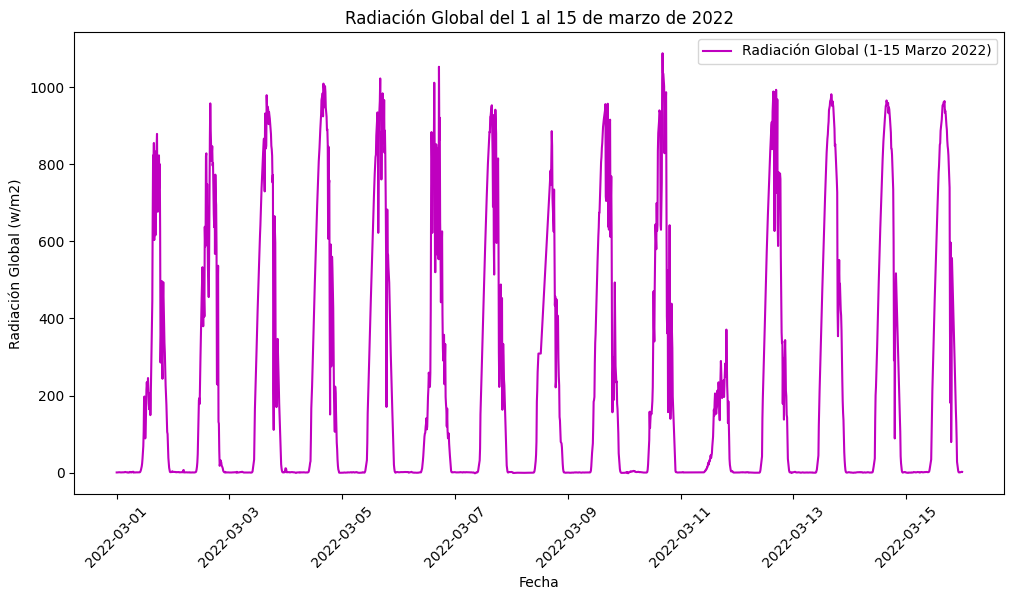

In [58]:
# Filtrar por un rango de fechas, por ejemplo, del 1 al 15 de marzo de 2022
rango_fechas = estacion_meteorologica.loc['2022-03-01':'2022-03-15']

# Graficar
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(rango_fechas.index, rango_fechas['Radic Global (w/m2)'], color='m', label='Radiación Global (1-15 Marzo 2022)')
plt.xticks(rotation=45)
plt.title('Radiación Global del 1 al 15 de marzo de 2022')
plt.xlabel('Fecha')
plt.ylabel('Radiación Global (w/m2)')
plt.legend()
plt.show()